In [285]:

import gzip
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
#Having a look at all of our data we will use so we can identify things we can examine

Gross = pd.read_csv('bom.movie_gross.csv.gz')
display(Gross)


Basics = pd.read_csv('imdb.name.basics.csv.gz')
display (Basics)

Akas = pd.read_csv('imdb.title.akas.csv.gz')
display (Akas)

Principals = pd.read_csv('imdb.title.principals.csv.gz')
display (Principals)

Ratings = pd.read_csv ('imdb.title.ratings.csv.gz')
display (Ratings)

Budgets = pd.read_csv ('tn.movie_budgets.csv.gz')
display (Budgets)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [286]:
#Taking our personnel information data set
Basics = pd.read_csv('imdb.name.basics.csv.gz')


#Step 1 Cleaning and Verification: Checking that this is an active database: Cleaning out entries where the person has passed away (death year is not null). Then just hiding the birth and death year fromt he table because it is not that significant to the study.
Basics = Basics.drop(Basics [Basics['death_year'].notnull()].index)
Basics = Basics.drop(['birth_year','death_year'], axis = 1)

#Renaming for ease

Basics.rename(columns={'nconst':'noID','primary_name':'Name','primary_profession':'Profession','known_for_titles':'Titles'},inplace=True)
#Step 2 Cleaning and Verification:Checking for duplicate entries - checking via their 'nconst' ID but keep the first row entry where they appeared

(Basics.drop_duplicates('noID'))


#Step 3: Also going to remove people who dont have titles associatedwith them
Basics = Basics.dropna(subset=['Titles'])
display (Basics)

,noID,Name,Profession,Titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...
606640,nm9989854,Layla Louise,"actress,stunts","tt9910102,tt9898328,tt9335490,tt8894778"
606642,nm9990296,Fleurette Dicaire,NaN,tt8319420
606644,nm9990690,Joo Yeon So,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,actress,"tt8734436,tt9615610"


id                int64
release_date     object
movie            object
Budget            int64
DomGross          int64
GlobalGross       int64
TotalGross        int64
TotalProfit       int64
ROI             float64
dtype: object


,id,release_date,movie,Budget,DomGross,GlobalGross,TotalGross,TotalProfit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,8.322007
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,3.133774
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,0.550071
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,5.632244
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,6.110105
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,288977,282977,48.162833
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2676,-2324,0.535200
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400,0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

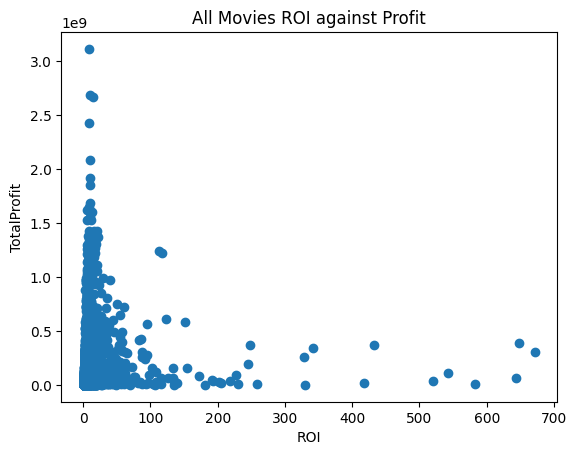

In [318]:
#Now going to work with the movie budgets dataset

#Renaming columns for ease

Budgets.rename(columns = {'production_budget':'Budget','domestic_gross':'DomGross','worldwide_gross':'GlobalGross'},inplace = True)


#Budgets['DomGross'] = Budgets['DomGross'].str.replace('$', '').str.replace('', '').astype(float)

#Cleaning duplicates 
Budgets = (Budgets.drop_duplicates('movie'))

#Removing commas and dollar signs from the strings so they can be converted 
Budgets['DomGross'] = Budgets['DomGross'].astype(str)
Budgets['DomGross'] = Budgets['DomGross'].str.replace('$', '').str.replace(',', '')
Budgets['GlobalGross'] = Budgets['GlobalGross'].astype(str)
Budgets['GlobalGross'] = Budgets['GlobalGross'].str.replace('$', '').str.replace(',', '')

#Converting the datatypes to numerical so they can be calculated 
Budgets['DomGross'] = pd.to_numeric(Budgets['DomGross'], errors='coerce')
Budgets['GlobalGross'] = pd.to_numeric(Budgets['GlobalGross'], errors='coerce')
print(Budgets.dtypes)

#Creating new column 'Total Gross' which will be how much the movie has earnt in total
Budgets['TotalGross'] = Budgets['DomGross'] + Budgets['GlobalGross']

#Now also converting Budget column to a numerical datatype from string
Budgets['Budget'] = Budgets['Budget'].astype(str)
Budgets['Budget'] = Budgets['Budget'].str.replace('$','').str.replace(',','')
Budgets['Budget'] = pd.to_numeric(Budgets['Budget'],errors='coerce')

#Now creating to more results rows TotalProfit and ROI
Budgets['TotalProfit'] = Budgets['TotalGross']-Budgets['Budget']
Budgets['ROI'] = Budgets['TotalGross'] / Budgets['Budget']


display(Budgets)

Budgets_plot = Budgets.copy()
Budgets_plot = Budgets_plot[Budgets_plot['ROI'] > 1].sort_values(by=['ROI'], ascending=False)
Budgets_plot= Budgets_plot.iloc[1:]

x = Budgets_plot['ROI']
y = Budgets_plot['TotalProfit']

plt.scatter (x,y)
plt.xlabel ("ROI")
plt.ylabel ('TotalProfit')
plt.title ("All Movies ROI against Profit")
plt.show




In [301]:
#Sorting the budgets data by ROI in descending order
sorted_ROI = Budgets[Budgets['ROI'] > 1].sort_values(by=['ROI'], ascending=False)
sorted_ROI= sorted_ROI.drop(['Budget','DomGross','GlobalGross','release_date','id','TotalGross','TotalProfit'], axis = 1)




#Going to exclude the top ROI as it is 3600 which is a bit of an outlier seeing that the next 3 biggest are in the 650s. Then going to grab the next 100 top ROIs to 'define' the top performing movies in box office.
sorted_ROI = sorted_ROI.iloc[1:]
Roi100 = sorted_ROI

#Adding a new ranking index to identify what rank a movie is in terms of final profit
Roi100 = Roi100.reset_index(drop=True) 

#The index starts at 0 so going to make it start at 1
Roi100.index = Roi100.index + 1 

# Rename the 'index' column 
Roi100 = Roi100.rename(columns={'index':'Top 100 ROI Rank'})
RoiSummary = Roi100.describe()
display(RoiSummary)
display(Roi100)


,ROI
count,4106.000000
mean,9.290299
std,30.911974
min,1.002127
25%,2.304921
50%,4.097296
75%,7.555405
max,671.337431


,movie,ROI
1,Paranormal Activity,671.337431
2,The Blair Witch Project,648.065165
3,The Gallows,644.208840
4,El Mariachi,583.264000
5,Mad Max,542.500000
...,...,...
4102,Glitter,1.005499
4103,Repo Men,1.004289
4104,Birthday Girl,1.003894
4105,The Missing,1.002366


In [289]:
#HYPOTEHSIS 1: FRANCHISE MOVIES PERFORM BETTER THAN MOST MOVIES IN ROI
#Test using unpaired t-test p-value analysis 
#Using 3 big household name franchises

#Pull Star Wars data from the ROIs
ROIStarWars = sorted_ROI[ sorted_ROI['movie'].str.contains('Star Wars', case=False) ]
display(ROIStarWars)
display(ROIStarWars.describe())

#Pull Harry Potter data from the ROIs
ROIHP = sorted_ROI[ sorted_ROI['movie'].str.contains('Harry Potter', case=False) ]
display(ROIHP)
display(ROIHP.describe())

#Pull Lord of the Rings data from the ROIs
ROILoR = sorted_ROI[ sorted_ROI['movie'].str.contains('Lord of the Rings', case=False) ]
display(ROILoR)
display(ROILoR.describe())

#Pull the Avengers franchise from the ROIs
ROIMarvel = sorted_ROI[ sorted_ROI['movie'].str.contains('Avengers', case=False) ]
display(ROIMarvel)
display(ROIMarvel.describe())

#Concatenate them as they will become 'franchise data'
Franchise_data = pd.concat([ROIStarWars,ROIHP,ROILoR])
display(Franchise_data)
display(Franchise_data.describe())

#Removing the franchise movies from the original dataset using their index numbers so they can be compared
Other_data = sorted_ROI[~sorted_ROI.index.isin(Franchise_data.index)]
print(Other_data)

#Perform unpaired t-test analysis 
t_stat, p_value = stats.ttest_ind(Franchise_data['ROI'], Other_data['ROI'])

# Significance level
alpha = 0.05

# Print results
t_stat = '{:.2e}'.format(t_stat)
p_value= '{:.2e}'.format(p_value)
print(f"The t-stat value of {t_stat} was calculated")
print(f"The p-value value of  {p_value} was calculated")




,movie,ROI
3464,Star Wars Ep. IV: A New Hope,113.417819
2367,Star Wars Ep. V: The Empire Strikes Back,35.844926
1783,Star Wars Ep. VI: Return of the Jedi,27.135697
303,Star Wars Ep. I: The Phantom Menace,13.057299
3831,Star Wars: The Clone Wars,12.218470
304,Star Wars Ep. III: Revenge of the Sith,10.689300
5,Star Wars Ep. VII: The Force Awakens,9.771155
305,Star Wars Ep. II: Attack of the Clones,8.411934
44,Rogue One: A Star Wars Story,7.906401
4,Star Wars Ep. VIII: The Last Jedi,6.110105


,ROI
count,11.000000
mean,22.433644
std,31.707808
min,2.206978
25%,8.159167
50%,10.689300
75%,20.096498
max,113.417819


,movie,ROI
260,Harry Potter and the Deathly Hallows: Part II,13.783091
363,Harry Potter and the Chamber of Secrets,11.414585
262,Harry Potter and the Sorcererâs Stone,10.343353
263,Harry Potter and the Deathly Hallows: Part I,10.052505
157,Harry Potter and the Order of the Phoenix,8.234758
238,Harry Potter and the Prisoner of Azkaban,8.051270
158,Harry Potter and the Goblet of Fire,7.915344
19,Harry Potter and the Half-Blood Prince,4.949212


,ROI
count,8.000000
mean,9.343015
std,2.665931
min,4.949212
25%,8.017288
50%,9.143632
75%,10.611161
max,13.783091


,movie,ROI
425,The Lord of the Rings: The Return of the King,16.162226
426,The Lord of the Rings: The Two Towers,13.587751
342,The Lord of the Rings: The Fellowship of the Ring,11.034456


,ROI
count,3.000000
mean,13.594811
std,2.563892
min,11.034456
25%,12.311104
50%,13.587751
75%,14.874989
max,16.162226


,movie,ROI
26,The Avengers,9.516513
6,Avengers: Infinity War,9.089832
3,Avengers: Age of Ultron,5.632244


,ROI
count,3.000000
mean,8.079530
std,2.130122
min,5.632244
25%,7.361038
50%,9.089832
75%,9.303173
max,9.516513


,movie,ROI
3464,Star Wars Ep. IV: A New Hope,113.417819
2367,Star Wars Ep. V: The Empire Strikes Back,35.844926
1783,Star Wars Ep. VI: Return of the Jedi,27.135697
303,Star Wars Ep. I: The Phantom Menace,13.057299
3831,Star Wars: The Clone Wars,12.218470
304,Star Wars Ep. III: Revenge of the Sith,10.689300
5,Star Wars Ep. VII: The Force Awakens,9.771155
305,Star Wars Ep. II: Attack of the Clones,8.411934
44,Rogue One: A Star Wars Story,7.906401
4,Star Wars Ep. VIII: The Last Jedi,6.110105


,ROI
count,22.000000
mean,16.468120
std,22.823458
min,2.206978
25%,8.097142
50%,10.516326
75%,13.455138
max,113.417819


                        movie         ROI
5492      Paranormal Activity  671.337431
5406  The Blair Witch Project  648.065165
5679              The Gallows  644.208840
5773              El Mariachi  583.264000
5613                  Mad Max  542.500000
...                       ...         ...
3845                  Glitter    1.005499
1812                 Repo Men    1.004289
3292            Birthday Girl    1.003894
810               The Missing    1.002366
927                 Dragonfly    1.002127

[4084 rows x 2 columns]
The t-stat value of 1.09e+00 was calculated
The p-value value of  2.75e-01 was calculated


In [319]:
sorted_TotalProfit = Budgets.sort_values(by='TotalProfit', ascending=False)
sorted_TotalProfit= sorted_TotalProfit.drop(['Budget','DomGross','GlobalGross','release_date','id','TotalGross','ROI'], axis = 1)

#Grabbing the top 100  of the sorted profit list
Profit100 = sorted_TotalProfit.head(100)

#Adding a new ranking index to identify what rank a movie is in terms of final profit
Profit100 = Profit100.reset_index(drop=True) 

#The index starts at 0 so going to make it start at 1
Profit100.index = Profit100.index + 1 

# Rename the 'index' column 
Profit100 = Profit100.rename(columns={'index':'Top 100 Profit Rank'})


ProfitSummary = Profit100.describe()
display(ProfitSummary)
display(Profit100)

,TotalProfit
count,1.000000e+02
mean,1.222976e+09
std,3.989696e+08
min,8.494675e+08
25%,9.687091e+08
50%,1.110183e+09
75%,1.311665e+09
max,3.111853e+09


,movie,TotalProfit
1,Avatar,3111852904
2,Star Wars Ep. VII: The Force Awakens,2683973445
3,Titanic,2667572339
4,Avengers: Infinity War,2426949682
5,Jurassic World,2086125489
...,...,...
96,The Da Vinci Code,860356597
97,Gravity,857791378
98,Fantastic Beasts and Where to Find Them,856440428
99,Star Wars Ep. II: Attack of the Clones,852372355


In [291]:
#HYPOTEHSIS 3: FRANCHISE MOVIES PERFORM BETTER THAN MOST MOVIES IN PROFIT
#Test using unpaired t-test p-value analysis 
#Using 4 big household name franchises

#Pull Star Wars data from the total profit data
TPStarWars = sorted_TotalProfit[ sorted_TotalProfit['movie'].str.contains('Star Wars', case=False) ]
display(TPStarWars)
display(TPStarWars.describe())

#Pull Harry Potter data from the total profit data
TPHP = sorted_TotalProfit[ sorted_TotalProfit['movie'].str.contains('Harry Potter', case=False) ]
display(TPHP)
display(TPHP.describe())

#Pull Lord of the Rings data from the total profit data
TPLoR = sorted_TotalProfit[sorted_TotalProfit['movie'].str.contains('Lord of the Rings', case=False) ]
display(TPLoR)
display(TPLoR.describe())

#Pull Avengers data from the total profit data
TPMarvel = sorted_TotalProfit[sorted_TotalProfit['movie'].str.contains('Avengers', case=False) ]
display(TPMarvel)
display(TPMarvel.describe())


#Concatenate them as they will become 'franchise total profit data'
FranchiseTPdata = pd.concat([TPStarWars,TPHP,TPLoR,TPMarvel])
display(FranchiseTPdata)
display(FranchiseTPdata.describe())

#Removing the franchise movies from the original dataset using their index numbers so they can be compared
OtherTPdata = sorted_TotalProfit[~sorted_TotalProfit.index.isin(FranchiseTPdata.index)]
print(OtherTPdata)

#Perform unpaired t-test analysis 
t_stat, p_value = stats.ttest_ind(FranchiseTPdata['TotalProfit'], OtherTPdata['TotalProfit'])

#Significance level
alpha = 0.05

# Print results
t_stat = '{:.2e}'.format(t_stat)
p_value= '{:.2e}'.format(p_value)
print(f"The t-stat value of {t_stat} was calculated")
print(f"The p-value value of  {p_value} was calculated")




,movie,TotalProfit
5,Star Wars Ep. VII: The Force Awakens,2683973445
4,Star Wars Ep. VIII: The Last Jedi,1619903129
303,Star Wars Ep. I: The Phantom Menace,1386589354
44,Rogue One: A Star Wars Story,1381280180
3464,Star Wars Ep. IV: A New Hope,1236596014
304,Star Wars Ep. III: Revenge of the Sith,1114269454
305,Star Wars Ep. II: Attack of the Clones,852372355
1783,Star Wars Ep. VI: Return of the Jedi,849410158
2367,Star Wars Ep. V: The Empire Strikes Back,801433294
11,Solo: A Star Wars Story,331918859


,TotalProfit
count,1.100000e+01
mean,1.123009e+09
std,6.903676e+08
min,9.535700e+07
25%,8.254217e+08
50%,1.114269e+09
75%,1.383935e+09
max,2.683973e+09


,movie,TotalProfit
260,Harry Potter and the Deathly Hallows: Part II,1597886314
262,Harry Potter and the Sorcererâs Stone,1167919073
263,Harry Potter and the Deathly Hallows: Part I,1131563136
157,Harry Potter and the Order of the Phoenix,1085213717
363,Harry Potter and the Chamber of Secrets,1041458516
158,Harry Potter and the Goblet of Fire,1037301546
19,Harry Potter and the Half-Blood Prince,987303045
238,Harry Potter and the Prisoner of Azkaban,916665049


,TotalProfit
count,8.000000e+00
mean,1.120664e+09
std,2.083860e+08
min,9.166650e+08
25%,1.024802e+09
50%,1.063336e+09
75%,1.140652e+09
max,1.597886e+09


,movie,TotalProfit
425,The Lord of the Rings: The Return of the King,1425249246
426,The Lord of the Rings: The Two Towers,1183248629
342,The Lord of the Rings: The Fellowship of the Ring,1093755735


,TotalProfit
count,3.000000e+00
mean,1.234085e+09
std,1.714940e+08
min,1.093756e+09
25%,1.138502e+09
50%,1.183249e+09
75%,1.304249e+09
max,1.425249e+09


,movie,TotalProfit
6,Avengers: Infinity War,2426949682
26,The Avengers,1916215444
3,Avengers: Age of Ultron,1531419831


,TotalProfit
count,3.000000e+00
mean,1.958195e+09
std,4.492384e+08
min,1.531420e+09
25%,1.723818e+09
50%,1.916215e+09
75%,2.171583e+09
max,2.426950e+09


,movie,TotalProfit
5,Star Wars Ep. VII: The Force Awakens,2683973445
4,Star Wars Ep. VIII: The Last Jedi,1619903129
303,Star Wars Ep. I: The Phantom Menace,1386589354
44,Rogue One: A Star Wars Story,1381280180
3464,Star Wars Ep. IV: A New Hope,1236596014
304,Star Wars Ep. III: Revenge of the Sith,1114269454
305,Star Wars Ep. II: Attack of the Clones,852372355
1783,Star Wars Ep. VI: Return of the Jedi,849410158
2367,Star Wars Ep. V: The Empire Strikes Back,801433294
11,Solo: A Star Wars Story,331918859


,TotalProfit
count,2.500000e+01
mean,1.235810e+09
std,5.531749e+08
min,9.535700e+07
25%,9.873030e+08
50%,1.131563e+09
75%,1.425249e+09
max,2.683973e+09


                           movie  TotalProfit
0                         Avatar   3111852904
42                       Titanic   2667572339
33                Jurassic World   2086125489
41                 Black Panther   1848317790
66                     Furious 7   1681729814
..                           ...          ...
479                       Bright    -90000000
480             Army of the Dead    -90000000
341  Men in Black: International   -103800000
194                     Moonfall   -150000000
2                   Dark Phoenix   -157475300

[5673 rows x 2 columns]
The t-stat value of 2.88e+01 was calculated
The p-value value of  7.38e-170 was calculated


,movie,ROI,TotalProfit,ROI Index,Profit Index
0,ET: The Extra-Terrestrial,116.959608,1217575880,33,38
1,Star Wars Ep. IV: A New Hope,113.417819,1236596014,36,35
2,The Passion of the Christ,39.724994,968124854,113,77
3,It,29.283992,989939717,162,67
4,The Sixth Sense,24.157815,926312584,212,88
...,...,...,...,...,...
95,The Hobbit: The Battle of the Five Armies,4.802790,950697409,1738,82
96,Batman v Superman: Dawn of Justice,4.791442,947860475,1742,83
97,Spider-Man 3,4.772832,973390533,1754,72
98,Pirates of the Caribbean: At Worldâs End,4.242803,972840850,1981,73


<function matplotlib.pyplot.show(close=None, block=None)>

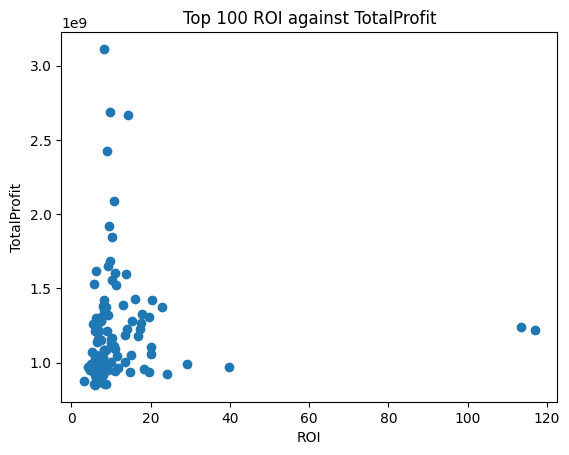

In [314]:
#Creating a new table to show the highest ROIs AND Total Profit
# Assuming 'Roi100' and 'Profit100' are your DataFrames
# Assuming 'merged_Roi100' and 'merged_Profit100' are the DataFrames obtained after merging and you want to include their respective index numbers as columns

# Perform inner join on 'movie' column
Top100 = pd.merge(Roi100, Profit100, on='movie', how='inner', suffixes=('_roi', '_profit'))

# Create new columns for index numbers from each DataFrame
Top100['ROI Index'] = Top100.apply(lambda row: Roi100[Roi100['movie'] == row['movie']].index[0], axis=1)
Top100['Profit Index'] = Top100.apply(lambda row: Profit100[Profit100['movie'] == row['movie']].index[0], axis=1)

# Print the resulting DataFrame
display(Top100)

#Plotting ROI against TotalProfit to examine any trends
x = Top100['ROI']
y = Top100['TotalProfit']

plt.scatter (x,y)
plt.xlabel ("ROI")
plt.ylabel ('TotalProfit')
plt.title ("Top 100 ROI against TotalProfit")
plt.show


In [293]:
#Marrying the Title IDs with Titles to identify movies
#Using the titles database we will anlayse only the English titles
AkasRegions = Akas['region'].unique()

#Cleaning the data a bit 
#Remove any nulls 
Akas = Akas.fillna("")


#If 'US' represents the United States then using US to remove other languages
US_Titles = Akas[Akas['region']=='US']

#Join strings together to put all the editions of the name under one title id
Group_Titles = US_Titles.groupby('title_id')['title'].apply(lambda x: '/'.join(x)).reset_index()
display(Group_Titles)
JW_Check = Group_Titles[Group_Titles['title_id'] == 'tt0369610']
display(JW_Check)



,title_id,title
0,tt0069049,The Other Side of the Wind
1,tt0112502,Bigfoot
2,tt0159369,Cooper and Hemingway: The True Gen
3,tt0192528,Heaven & Hell
4,tt0230212,The Final Journey
...,...,...
47428,tt9837530,Monkey King Reloaded
47429,tt9845398,End of the Century
47430,tt9875852,The House Elf
47431,tt9882084,Chasing Happiness


,title_id,title
27,tt0369610,Jurassic World 3D/Jurassic World/Ebb Tide/Jura...


In [294]:
#MERGED BASICS - INFORAMTION: NAME/PROFESSION/TITLES
#Splitting the string of movie codes up
Basics_split = Basics['Titles'].str.split(',', expand=True)

#Using the split strings concatenate the two tables back together again so each person has a new movie in each column that they participated in 
Merged_Basics = pd.concat([Basics,Basics_split],axis=1)


Merged_Basics = Merged_Basics.drop('Titles', axis=1)
Merged_Basics = Merged_Basics.drop('noID', axis=1)
#Checking if it worked
display(Merged_Basics)



,Name,Profession,0,1,2,3,4,5
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt0837562,tt2398241,tt0844471,tt0118553,None,None
1,Joseph Bauer,"composer,music_department,sound_department",tt0896534,tt6791238,tt0287072,tt1682940,None,None
2,Bruce Baum,"miscellaneous,actor,writer",tt1470654,tt0363631,tt0104030,tt0102898,None,None
3,Axel Baumann,"camera_department,cinematographer,art_department",tt0114371,tt2004304,tt1618448,tt1224387,None,None
4,Pete Baxter,"production_designer,art_department,set_decorator",tt0452644,tt0452692,tt3458030,tt2178256,None,None
...,...,...,...,...,...,...,...,...
606640,Layla Louise,"actress,stunts",tt9910102,tt9898328,tt9335490,tt8894778,None,None
606642,Fleurette Dicaire,NaN,tt8319420,None,None,None,None,None
606644,Joo Yeon So,actress,tt9090932,tt8737130,None,None,None,None
606645,Madeline Smith,actress,tt8734436,tt9615610,None,None,None,None


In [295]:
#Point 2: HIGH RATINGS

#Merging the movies with their ratings 
Movie_Ratings = pd.merge(Ratings,Group_Titles, left_on='tconst',right_on='title_id',how='inner')

#Dropping the duplicate line used for merging
Movie_Ratings=Movie_Ratings.drop('title_id',axis=1)



#Sorting movies by their ratings only if they have over 100 'voted' reviews to eliminate small sample sizes
Sortratings = Movie_Ratings[Movie_Ratings['numvotes'] > 1000].sort_values(by=['averagerating'], ascending=False)

#Check Ratings
display(Merged_Basics)
display(Sortratings)

#Merging Basics (to get actors/people who worked on the movie) to merge with this ratings list to get the movie ratings they worked on
#Looping through each 6 of the columns assigned to actors from 'Merged Basics' 
# Merge Merged_Basics with Sortratings to get the ratings for each movie


Merged_Ratings = Merged_Basics.copy()
# Create dictionary to assign rating values to the movie IDs
sort_ratings_dict = dict(zip(Sortratings['tconst'], Sortratings['averagerating']))

# Go through all the columns and if the values of the dictionary 'tconst' match the values in the columns [0,1,2,3,4,5,], replace them with the rating value 
Merged_Ratings[0] = Merged_Ratings[0].map(sort_ratings_dict)
Merged_Ratings[1] = Merged_Ratings[1].map(sort_ratings_dict)
Merged_Ratings[2] = Merged_Ratings[2].map(sort_ratings_dict)
Merged_Ratings[3] = Merged_Ratings[3].map(sort_ratings_dict)
Merged_Ratings[4] = Merged_Ratings[4].map(sort_ratings_dict)
Merged_Ratings[5] = Merged_Ratings[5].map(sort_ratings_dict)

#Create a persons average rating
#Dropping people with only 1 or none movie rated on their profile so that the results are not too skewed
Merged_Ratings = Merged_Ratings.dropna(subset=[0,1,2,3,4,5], thresh=2)
Merged_Ratings['Average Rating'] = Merged_Ratings[[0,1,2,3,4,5]].mean(axis=1)

#Removing the data columns to clean up the table
Merged_Ratings = Merged_Ratings.drop([0],axis=1)
Merged_Ratings = Merged_Ratings.drop([1],axis=1)
Merged_Ratings = Merged_Ratings.drop([2],axis=1)
Merged_Ratings = Merged_Ratings.drop([3],axis=1)
Merged_Ratings = Merged_Ratings.drop([4],axis=1)
Merged_Ratings = Merged_Ratings.drop([5],axis=1)

#Sort them out from highest to lowest
Merged_Ratings = Merged_Ratings.sort_values(by='Average Rating', ascending=False)

# Display Merged_Ratings 
display(Merged_Ratings)

#Create another table to add movie names to people
Merged_Titles = Merged_Basics.copy()

#Create new dictionary assigning names of movies titles with IDs
sort_movienames_dict = dict(zip(Sortratings['tconst'], Sortratings['title']))

# Go through all the columns and if the values of the dictionary 'tconst' match the values in the columns [0,1,2,3,4,5,], replace them with the movie name
Merged_Titles[0] = Merged_Titles[0].map(sort_movienames_dict)
Merged_Titles[1] = Merged_Titles[1].map(sort_movienames_dict)
Merged_Titles[2] = Merged_Titles[2].map(sort_movienames_dict)
Merged_Titles[3] = Merged_Titles[3].map(sort_movienames_dict)
Merged_Titles[4] = Merged_Titles[4].map(sort_movienames_dict)
Merged_Titles[5] = Merged_Titles[5].map(sort_movienames_dict)


Merged_Titles = Merged_Titles.dropna(subset=[0,1,2,3,4,5], thresh=2)
Merged_Titles[[0,1,2,3,4,5]]= Merged_Titles[[0,1,2,3,4,5]].fillna('')

Merged_Titles['Known Titles'] = Merged_Titles[[0, 1, 2, 3, 4, 5]].apply(lambda x: ', '.join(str(item) for item in x), axis=1)


Merged_Titles = Merged_Titles.drop([0],axis=1)
Merged_Titles = Merged_Titles.drop([1],axis=1)
Merged_Titles = Merged_Titles.drop([2],axis=1)
Merged_Titles = Merged_Titles.drop([3],axis=1)
Merged_Titles = Merged_Titles.drop([4],axis=1)
Merged_Titles = Merged_Titles.drop([5],axis=1)

#FOR ME: to check if they show properly
display(Merged_Titles)
#FOR ME:  Check if a value exists in the dictionary
check = 'tt2398241'
if check in sort_ratings_dict:
    print(f"The value {check} exists in the dictionary.")
else:
    print(f"The value {check} does not exist in the dictionary.")




,Name,Profession,0,1,2,3,4,5
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt0837562,tt2398241,tt0844471,tt0118553,None,None
1,Joseph Bauer,"composer,music_department,sound_department",tt0896534,tt6791238,tt0287072,tt1682940,None,None
2,Bruce Baum,"miscellaneous,actor,writer",tt1470654,tt0363631,tt0104030,tt0102898,None,None
3,Axel Baumann,"camera_department,cinematographer,art_department",tt0114371,tt2004304,tt1618448,tt1224387,None,None
4,Pete Baxter,"production_designer,art_department,set_decorator",tt0452644,tt0452692,tt3458030,tt2178256,None,None
...,...,...,...,...,...,...,...,...
606640,Layla Louise,"actress,stunts",tt9910102,tt9898328,tt9335490,tt8894778,None,None
606642,Fleurette Dicaire,NaN,tt8319420,None,None,None,None,None
606644,Joo Yeon So,actress,tt9090932,tt8737130,None,None,None,None
606645,Madeline Smith,actress,tt8734436,tt9615610,None,None,None,None


,tconst,averagerating,numvotes,title
22915,tt7131622,9.7,5600,Untitled #9/Once Upon a Time ... in Hollywood
1731,tt7738784,9.4,9629,Peranbu
17789,tt2170667,9.3,17308,Wheels
12763,tt2412748,9.1,1013,Saving Mes Aynak/The Buddhas of Aynak
26649,tt8948790,9.0,1778,Jersey
...,...,...,...,...
20199,tt1702443,1.6,74978,Justin Bieber: Never Say Never - Director's Fa...
21058,tt2071491,1.6,3697,Jurassic Shark
6567,tt4458206,1.5,26723,Code Name: K.O.Z.
3390,tt4009460,1.5,14221,Saving Christmas/Kirk Cameron's Saving Christmas


,Name,Profession,Average Rating
58856,David Steen,"actor,writer,producer",9.05
349072,Bagavathi Perumal,actor,8.80
103641,Shannon McIntosh,"producer,production_manager,writer",8.75
326605,Alex R. Wagner,"producer,director,writer",8.65
43617,Kevin Marshall,"miscellaneous,actor,cinematographer",8.65
...,...,...,...
460408,Robert Stuvland,"editorial_department,editor,producer",2.40
306029,David Courtice,"editorial_department,producer,miscellaneous",2.40
187751,James Nguyen,"writer,director,actor",1.75
244337,Alan Bagh,"actor,producer,director",1.75


,Name,Profession,Known Titles
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer","Hotel Transylvania, Get Smurfy/Smurfs: The Los..."
1,Joseph Bauer,"composer,music_department,sound_department",", Totem, , Playback/Playback: Bloodline, ,"
3,Axel Baumann,"camera_department,cinematographer,art_department",", Mission Blue, Racing Extinction/6/The Singin..."
24,Gregg Bello,"actor,producer","Noah, Mother!, , , ,"
39,Richard Berge,"producer,miscellaneous,writer",", The Island President, Audrie & Daisy, An Inc..."
...,...,...,...
604714,Kabir Sajid,actor,", Bharat, , Andhadhun, ,"
604972,Ritesh Ghosh,"casting_department,casting_director,director",", Wrestling Competition/Dangal, Brother Bajran..."
605273,Alysoun Wolfe,producer,God's Not Dead 3/God's Not Dead: A Light in Da...
606101,Barnaby Jay,"miscellaneous,cinematographer,camera_department","Fantastic Beasts: The Crimes of Grindelwald, C..."


The value tt2398241 exists in the dictionary.


,title,release_date,Budget,DomGross,GlobalGross,TotalGross,TotalProfit,ROI,averagerating
0,Jurassic World,"Jun 12, 2015",215000000,652270625,1648854864,2301125489,2086125489,10.702909,7.0
1,John Carter,"Mar 9, 2012",275000000,73058679,282778100,355836779,80836779,1.293952,6.6
2,Alice in Wonderland,"Mar 5, 2010",200000000,334191110,1025491110,1359682220,1159682220,6.798411,6.5
3,The Bourne Legacy,"Aug 10, 2012",125000000,113203870,280355920,393559790,268559790,3.148478,6.7
4,Limitless,"Mar 18, 2011",27000000,79249455,155564919,234814374,207814374,8.696829,7.4
...,...,...,...,...,...,...,...,...,...
1920,The Big Sick,"Jun 23, 2017",5000000,42872467,53972860,96845327,91845327,19.369065,7.6
1921,Coming Home,"Jan 1, 1978",3000000,32653000,32653000,65306000,62306000,21.768667,6.0
1922,Thoroughbreds,"Mar 9, 2018",5000000,3072605,3187302,6259907,1259907,1.251981,6.7
1923,Aladdin,"May 24, 2019",182000000,246734314,619234314,865968628,683968628,4.758069,7.4


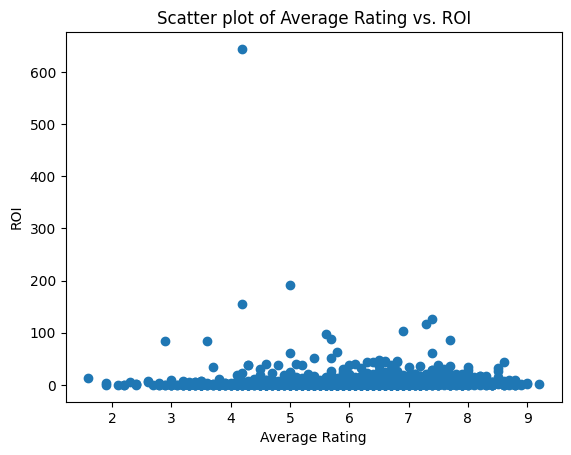

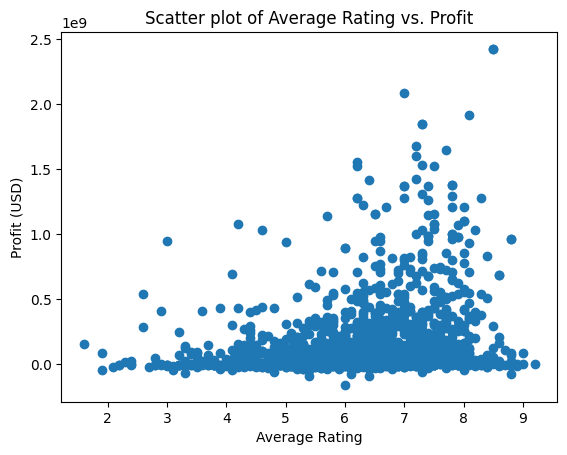

The Pearson's correlation coefficient has a value of 0.2541703309497307
The p_value for this calculation is 9.212704176142658e-30


In [300]:
#Point 3: Is there a correlation between ratings and gross and/or ROI - to support the point that they should try and hire people with high ratings on prior projects

#Merging Budgets (to get the money related numbers), Titles to get the associated movie names and their respecitve Ratings
Titles_Budget = pd.merge(US_Titles,Budgets,left_on='title',right_on='movie',how='inner')
Titles_Budget_Rating = pd.merge(Titles_Budget,Ratings,left_on = 'title_id',right_on='tconst',how='inner')
Titles_Budget_Rating = Titles_Budget_Rating.drop(['title_id','ordering','region','language','types','attributes','is_original_title','id','movie','tconst','numvotes'],axis=1)

display(Titles_Budget_Rating)



#Plotting ROI against the rating to look for any correlation
x = Titles_Budget_Rating['averagerating']
y = Titles_Budget_Rating['ROI']

#Plot the scatter
plt.scatter(x, y)
plt.xlabel('Average Rating')
plt.ylabel('ROI')
plt.title('Scatter plot of Average Rating vs. ROI')
plt.show()

#Plotting Profit against rating to look for any correlation
x = Titles_Budget_Rating['averagerating']
y = Titles_Budget_Rating['TotalProfit']

#Plot the scatter
plt.scatter(x, y)
plt.xlabel('Average Rating')
plt.ylabel('Profit (USD)')
plt.title('Scatter plot of Average Rating vs. Profit')
plt.show()

# Because there could be some correlation here perform a correlation test (Pearsons)
rating_average= Titles_Budget_Rating['averagerating']
profit_average = Titles_Budget_Rating['TotalProfit']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(rating_average,profit_average)

print(f"The Pearson's correlation coefficient has a value of {correlation_coefficient}")
print(f"The p_value for this calculation is {p_value}")
